# Import libraries

In [1]:
import os
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm

import seaborn as sns

from numpy.polynomial.polynomial import Polynomial

from scipy.signal import savgol_filter

from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm

In [2]:
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

In [3]:
path_to_save = './../results/01b_preprocessing'

# Loading data

In [4]:
path_to_data= './../data/parsed_data'

## FTIR-spectra

In [5]:
initial_data = pd.read_csv(f'{path_to_data}/ftir_raw_spectra.csv', sep=';', index_col=0)

initial_data.columns = initial_data.columns.astype(float)

print(initial_data.shape)
initial_data.head(3)

(75, 3733)


3998.31069  3997.34631  3996.38194  3995.41756  \
division_1_size_bulk   -0.008580   -0.008580   -0.008580   -0.008580   
division_1_size_5      -0.008005   -0.008005   -0.008005   -0.008005   
division_1_size_3      -0.003743   -0.003743   -0.003743   -0.003743   

                      3994.45318  3993.48880  3992.52442  3991.56005  \
division_1_size_bulk   -0.008580   -0.008580   -0.008580   -0.008612   
division_1_size_5      -0.008005   -0.008005   -0.008005   -0.008121   
division_1_size_3      -0.003743   -0.003743   -0.003743   -0.003775   

                      3990.59567  3989.63129  3988.66691  3987.70253  \
division_1_size_bulk   -0.008578   -0.008559   -0.008554   -0.008587   
division_1_size_5      -0.008191   -0.008250   -0.008269   -0.008278   
division_1_size_3      -0.003766   -0.003757   -0.003773   -0.003883   

                      3986.73816  3985.77378  3984.80940  3983.84502  \
division_1_size_bulk   -0.008574   -0.008486   -0.008457   -0.008504   
division_1_size_5      -0.008247   -0.008157   -0.008120   -0.008136   
division_1_size_3      -0.003973   -0.003965   -0.003945   -0.003949   

                      3982.88065  3981.91627  3980.95189  3979.98751  \
division_1_size_bulk   -0.008556   -0.008586   -0.008602   -0.008547   
division_1_size_5      -0.008145   -0.008111   -0.008079   -0.008044   
division_1_size_3      -0.003970   -0.003917   -0.003853   -0.003797   

                      3979.02313  3978.05876  3977.09438  3976.13000  \
division_1_size_bulk   -0.008460   -0.008443   -0.008471   -0.008505   
division_1_size_5      -0.007976   -0.007943   -0.007927   -0.007923   
division_1_size_3      -0.003700   -0.003678   -0.003729   -0.003794   

                      3975.16562  ...  422.39751   421.43313   420.46876   \
division_1_size_bulk   -0.008509  ...    0.005667    0.005664    0.005700   
division_1_size_5      -0.007929  ...    0.010026    0.010000    0.009974   
division_1_size_3      -0.003794  ...    0.005184    0.005200    0.005233   

                      419.50438   418.54000   417.57562   416.61124   \
division_1_size_bulk    0.005717    0.005726    0.005732    0.005741   
division_1_size_5       0.009935    0.009883    0.009873    0.009853   
division_1_size_3       0.005221    0.005201    0.005209    0.005200   

                      415.64687   414.68249   413.71811   412.75373   \
division_1_size_bulk    0.005662    0.005531    0.005438    0.005388   
division_1_size_5       0.009706    0.009551    0.009473    0.009416   
division_1_size_3       0.005069    0.004923    0.004889    0.004884   

                      411.78935   410.82498   409.86060   408.89622   \
division_1_size_bulk    0.005372    0.005361    0.005383    0.005366   
division_1_size_5       0.009341    0.009259    0.009198    0.009123   
division_1_size_3       0.004844    0.004761    0.004684    0.004632   

                      407.93184   406.96747   406.00309   405.03871   \
division_1_size_bulk    0.005290    0.005246    0.005210    0.005174   
division_1_size_5       0.009064    0.009072    0.009097    0.009078   
division_1_size_3       0.004606    0.004621    0.004636    0.004621   

                      404.07433   403.10995   402.14558   401.18120   \
division_1_size_bulk    0.005174    0.005174    0.005174    0.005174   
division_1_size_5       0.009078    0.009078    0.009078    0.009078   
division_1_size_3       0.004621    0.004621    0.004621    0.004621   

                      400.21682   399.25244   
division_1_size_bulk    0.005174    0.005174  
division_1_size_5       0.009078    0.009078  
division_1_size_3       0.004621    0.004621  

[3 rows x 3733 columns]

## Samples description

In [6]:
samples_description = pd.read_csv(f'{path_to_data}/samples_description.csv', sep=';', index_col=0)

print(samples_description.shape)
samples_description.head(3)

(75, 6)


Row_ID  Division  Size Fraction_hue  \
division_1_size_bulk       1         1  bulk        $> 0$   
division_1_size_5          2         1     5        $< 5$   
division_1_size_3          3         1     3        $< 3$   

                     Fraction_grouped_hue  Class  
division_1_size_bulk              $d > 5$      2  
division_1_size_5          $2 < d \leq 5$      1  
division_1_size_3          $2 < d \leq 5$      1

# Data preprocessing

## Waverange selection

In [7]:
initial_data = initial_data.loc[:, (initial_data.columns >= 650) & (initial_data.columns <= 4000)]

## Baseline correction

In [8]:
data = initial_data.copy()

for idx in data.index:
    coefs = Polynomial.fit(data.columns, data.loc[idx], deg=3).convert().coef
    baseline = np.polyval(coefs[::-1], data.columns)
    
    corrected_intensity = data.loc[idx] - baseline
    corrected_intensity -= corrected_intensity.min()
    
    data.loc[idx] = corrected_intensity

print(data.shape)
data.head(3)

(75, 3472)


3998.31069  3997.34631  3996.38194  3995.41756  \
division_1_size_bulk    0.001273    0.001261    0.001250    0.001239   
division_1_size_5       0.001713    0.001700    0.001686    0.001673   
division_1_size_3       0.001236    0.001227    0.001218    0.001209   

                      3994.45318  3993.48880  3992.52442  3991.56005  \
division_1_size_bulk    0.001227    0.001216    0.001205    0.001161   
division_1_size_5       0.001659    0.001646    0.001632    0.001502   
division_1_size_3       0.001200    0.001191    0.001182    0.001141   

                      3990.59567  3989.63129  3988.66691  3987.70253  \
division_1_size_bulk    0.001184    0.001191    0.001185    0.001141   
division_1_size_5       0.001419    0.001346    0.001314    0.001292   
division_1_size_3       0.001140    0.001140    0.001115    0.000996   

                      3986.73816  3985.77378  3984.80940  3983.84502  \
division_1_size_bulk    0.001142    0.001219    0.001238    0.001179   
division_1_size_5       0.001309    0.001386    0.001410    0.001380   
division_1_size_3       0.000897    0.000895    0.000906    0.000894   

                      3982.88065  3981.91627  3980.95189  3979.98751  \
division_1_size_bulk    0.001116    0.001074    0.001047    0.001091   
division_1_size_5       0.001357    0.001379    0.001397    0.001419   
division_1_size_3       0.000863    0.000908    0.000962    0.001010   

                      3979.02313  3978.05876  3977.09438  3976.13000  \
division_1_size_bulk    0.001167    0.001173    0.001134    0.001088   
division_1_size_5       0.001473    0.001494    0.001496    0.001487   
division_1_size_3       0.001098    0.001111    0.001050    0.000976   

                      3975.16562  ...  674.10014   673.13576   672.17138   \
division_1_size_bulk    0.001073  ...    0.000256    0.000354    0.000520   
division_1_size_5       0.001468  ...    0.000357    0.000396    0.000569   
division_1_size_3       0.000968  ...    0.000044    0.000070    0.000221   

                      671.20700   670.24263   669.27825   668.31387   \
division_1_size_bulk    0.000654    0.000772    0.000877    0.000917   
division_1_size_5       0.000762    0.000898    0.000975    0.001014   
division_1_size_3       0.000378    0.000507    0.000582    0.000604   

                      667.34949   666.38512   665.42074   664.45636   \
division_1_size_bulk    0.000870    0.000797    0.000725    0.000623   
division_1_size_5       0.001039    0.001040    0.000965    0.000820   
division_1_size_3       0.000603    0.000570    0.000480    0.000340   

                      663.49198   662.52760   661.56323   660.59885   \
division_1_size_bulk    0.000531    0.000476    0.000479    0.000492   
division_1_size_5       0.000650    0.000510    0.000491    0.000556   
division_1_size_3       0.000174    0.000054    0.000071    0.000134   

                      659.63447   658.67009   657.70571   656.74134   \
division_1_size_bulk    0.000478    0.000463    0.000442    0.000429   
division_1_size_5       0.000630    0.000697    0.000746    0.000811   
division_1_size_3       0.000157    0.000175    0.000180    0.000192   

                      655.77696   654.81258   653.84820   652.88382   \
division_1_size_bulk    0.000422    0.000427    0.000463    0.000508   
division_1_size_5       0.000892    0.000919    0.000876    0.000802   
division_1_size_3       0.000231    0.000259    0.000279    0.000299   

                      651.91945   650.95507   
division_1_size_bulk    0.000553    0.000575  
division_1_size_5       0.000727    0.000633  
division_1_size_3       0.000322    0.000338  

[3 rows x 3472 columns]

## Smoothing (*Savitzky–Golay*)

In [9]:
data_smoothed = data.copy()

for idx in data_smoothed.index:
    data_smoothed.loc[idx] = savgol_filter(data_smoothed.loc[idx], window_length=127, polyorder=3)

print(data_smoothed.shape)
data_smoothed.head(3)

(75, 3472)


3998.31069  3997.34631  3996.38194  3995.41756  \
division_1_size_bulk    0.001306    0.001293    0.001280    0.001268   
division_1_size_5       0.001638    0.001626    0.001615    0.001604   
division_1_size_3       0.001279    0.001259    0.001240    0.001221   

                      3994.45318  3993.48880  3992.52442  3991.56005  \
division_1_size_bulk    0.001256    0.001245    0.001234    0.001223   
division_1_size_5       0.001593    0.001582    0.001571    0.001561   
division_1_size_3       0.001202    0.001184    0.001167    0.001150   

                      3990.59567  3989.63129  3988.66691  3987.70253  \
division_1_size_bulk    0.001213    0.001202    0.001193    0.001183   
division_1_size_5       0.001551    0.001541    0.001531    0.001522   
division_1_size_3       0.001134    0.001118    0.001102    0.001088   

                      3986.73816  3985.77378  3984.80940  3983.84502  \
division_1_size_bulk    0.001174    0.001165    0.001156    0.001148   
division_1_size_5       0.001513    0.001504    0.001495    0.001486   
division_1_size_3       0.001073    0.001059    0.001046    0.001033   

                      3982.88065  3981.91627  3980.95189  3979.98751  \
division_1_size_bulk    0.001139    0.001132    0.001124    0.001117   
division_1_size_5       0.001478    0.001470    0.001462    0.001454   
division_1_size_3       0.001021    0.001009    0.000997    0.000986   

                      3979.02313  3978.05876  3977.09438  3976.13000  \
division_1_size_bulk    0.001110    0.001103    0.001096    0.001090   
division_1_size_5       0.001446    0.001439    0.001432    0.001424   
division_1_size_3       0.000976    0.000966    0.000956    0.000947   

                      3975.16562  ...  674.10014   673.13576   672.17138   \
division_1_size_bulk    0.001084  ...    0.000522    0.000522    0.000522   
division_1_size_5       0.001418  ...    0.000723    0.000722    0.000722   
division_1_size_3       0.000938  ...    0.000199    0.000202    0.000205   

                      671.20700   670.24263   669.27825   668.31387   \
division_1_size_bulk    0.000522    0.000522    0.000522    0.000521   
division_1_size_5       0.000721    0.000720    0.000719    0.000718   
division_1_size_3       0.000208    0.000211    0.000215    0.000218   

                      667.34949   666.38512   665.42074   664.45636   \
division_1_size_bulk    0.000521    0.000520    0.000519    0.000518   
division_1_size_5       0.000717    0.000716    0.000715    0.000714   
division_1_size_3       0.000222    0.000226    0.000230    0.000235   

                      663.49198   662.52760   661.56323   660.59885   \
division_1_size_bulk    0.000517    0.000515    0.000514    0.000512   
division_1_size_5       0.000713    0.000712    0.000710    0.000709   
division_1_size_3       0.000239    0.000244    0.000249    0.000254   

                      659.63447   658.67009   657.70571   656.74134   \
division_1_size_bulk    0.000510    0.000508    0.000506    0.000503   
division_1_size_5       0.000707    0.000706    0.000704    0.000703   
division_1_size_3       0.000259    0.000265    0.000270    0.000276   

                      655.77696   654.81258   653.84820   652.88382   \
division_1_size_bulk    0.000501    0.000498    0.000495    0.000491   
division_1_size_5       0.000701    0.000699    0.000697    0.000695   
division_1_size_3       0.000283    0.000289    0.000296    0.000302   

                      651.91945   650.95507   
division_1_size_bulk    0.000488    0.000484  
division_1_size_5       0.000693    0.000691  
division_1_size_3       0.000310    0.000317  

[3 rows x 3472 columns]

## Wavenumber range selection & scaling to range [0...1] (*MinMax*)

### Main data sets

*Five intervals were selected as the main ones for further analysis: 3800-2500, 1900-1800, 1800-1500, 1500-1300, 1300-900.*

In [10]:
ranges = [
    (3800, 2500),
    (1900, 800),
    (1800, 1500),
    (1500, 1300),
    (1300, 900)
]

data_smoothed_ranges = {}
data_scaled_ranges = {}

In [11]:
for range in ranges:
    high_boundary, low_boundary = range

    # Wavenumber range selection
    data_smoothed_ranges[range] = data_smoothed.loc[:, (data_smoothed.columns <= high_boundary) & (data_smoothed.columns >= low_boundary)]

    # Data scaling
    scaler = MinMaxScaler()

    data_scaled = data_smoothed_ranges[range].copy()
    data_scaled.iloc[:, :] = scaler.fit_transform(data_scaled.T).T
    data_scaled_ranges[range] = data_scaled

    # Main data sets statistics
    print(
        f'-' * 224,
        f'WAVENUMBER RANGE: {range}',
        f'(*) Smoothed data set shape: {data_smoothed_ranges[range].shape}',
        f'(*) Scaled data set shape: {data_scaled_ranges[range].shape}',
        f'(*) Wavenumber for smoothed data (max/min): {round(data_smoothed_ranges[range].columns.max()), round(data_smoothed_ranges[range].columns.min())}',
        f'(*) Wavenumber for scaled data (max/min): {round(data_smoothed_ranges[range].columns.max()), round(data_smoothed_ranges[range].columns.min())}',
        sep='\n'
    )
    # display(data_smoothed_ranges[range].head(3))

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
WAVENUMBER RANGE: (3800, 2500)
(*) Smoothed data set shape: (75, 1348)
(*) Scaled data set shape: (75, 1348)
(*) Wavenumber for smoothed data (max/min): (3800, 2501)
(*) Wavenumber for scaled data (max/min): (3800, 2501)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
WAVENUMBER RANGE: (1900, 800)
(*) Smoothed data set shape: (75, 1141)
(*) Scaled data set shape: (75, 1141)
(*) Wavenumber for smoothed data (max/min): (1900, 800)
(*) Wavenumber for scaled data (max/min): (1900, 800)
---------------------------------------------------------------------------------------------------------------

# Preprocessed data visualization

In [12]:
sns.set_theme()

In [13]:
divisions_lst = sorted(samples_description['Division'].unique())
print(divisions_lst)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## Base functions

In [14]:
def plot_spectra(data_vis, ax, samples_description=None, hue_column=None, style_params=None, plot_params=None, legend_params=None):
    if style_params is None:
        style_params = {
            "X_LABEL_FONT_SIZE": 14,
            "Y_LABEL_FONT_SIZE": 14,
            "X_TICK_FONT_SIZE": 12,
            "Y_TICK_FONT_SIZE": 12,
            "TITLE_FONT_SIZE": 16,
        }
    
    if plot_params is None:
        plot_params = {
            "X_LABEL": 'Волновое число, см$^{-1}$',
            "Y_LABEL": '$A$',
            "TITLE": '',
            "Y_LABELPAD": 5,
            "X_LABELPAD": 5,
            "X_NBINS": 12,
            "Y_NBINS": 12,
            "X_STEP": None,
            "Y_STEP": None,
            "LINEWIDTH": 2.5,
            "ALPHA": 0.8,
            "COLORMAP": 'bwr'
        }

    if legend_params is None:
        legend_params = {
            "TITLE": 'Тип размерной фракции, мкм',
            "LOC": 'best',
            "NCOL": 3,
            "FONTSIZE": 12,
            "TITLE_FONTSIZE": 14
        }

    if samples_description is not None and hue_column is not None:
        hue_values = samples_description.loc[data_vis.index, hue_column].astype(str)
        unique_hue_values = hue_values.unique()
        colors = cm.get_cmap(plot_params["COLORMAP"])(np.linspace(0.2, 1.0, len(unique_hue_values)))
        color_map = dict(zip(unique_hue_values, colors))

        plot_data = [(fraction, hue_values[fraction], color_map[hue_values[fraction]]) for fraction in data_vis.index]
    else:
        fractions_sorted = sorted(
            data_vis.index,
            key=lambda x: float(x.split('_')[-1].replace('bulk', '1000')),
            reverse=True
        )
        colors = cm.get_cmap(plot_params["COLORMAP"])(np.linspace(0.2, 1.0, len(fractions_sorted)))
        labels = [f'$> 0$' if frac.split('_')[-1] == 'bulk' else f'$< {frac.split("_")[-1]}$' for frac in fractions_sorted]
        plot_data = zip(fractions_sorted, labels, colors)

    seen_labels = set()
    for fraction, label, color in plot_data:
        legend_label = label if label not in seen_labels else None
        seen_labels.add(label)

        ax.plot(
            data_vis.columns,
            data_vis.loc[fraction],
            label=legend_label,
            alpha=plot_params["ALPHA"],
            color=color,
            linewidth=plot_params["LINEWIDTH"]
        )

    ax.set_title(plot_params["TITLE"], fontsize=style_params["TITLE_FONT_SIZE"], fontstyle='italic')
    
    ax.set_xlabel(plot_params['X_LABEL'], fontsize=style_params["X_LABEL_FONT_SIZE"], labelpad=plot_params["X_LABELPAD"])
    ax.set_ylabel(plot_params['Y_LABEL'], fontsize=style_params["Y_LABEL_FONT_SIZE"], labelpad=plot_params["Y_LABELPAD"], rotation=0)
    
    ax.tick_params(axis='x', labelsize=style_params["X_TICK_FONT_SIZE"])
    ax.tick_params(axis='y', labelsize=style_params["Y_TICK_FONT_SIZE"])

    if plot_params["X_STEP"] is None:
        ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=plot_params["X_NBINS"]))
    else:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(plot_params["X_STEP"]))
    
    if plot_params["Y_STEP"] is None:
        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=plot_params["Y_NBINS"]))
    else:
        ax.yaxis.set_major_locator(ticker.MultipleLocator(plot_params["Y_STEP"]))

    ax.invert_xaxis()

    ax.legend(
        title=legend_params["TITLE"],
        loc=legend_params["LOC"],
        ncol=legend_params["NCOL"],
        title_fontsize=legend_params["TITLE_FONTSIZE"],
        fontsize=legend_params["FONTSIZE"]
    )

In [15]:
def add_annotation(ax, text, xy=(0.013, 0.98), fontsize=12, facecolor='white', edgecolor='black', alpha=0.5):
    ax.annotate(
        text=text,
        xy=xy,
        xycoords='axes fraction',
        fontsize=fontsize,
        fontweight='bold',
        color='black',
        ha='left',
        va='top',
        bbox={
            'facecolor': facecolor,
            'edgecolor': edgecolor,
            'boxstyle': 'round',
            'alpha': alpha
        }
    )

## *Raw, BC-correted, smoothed* spectra

*Config-features for visualization*

In [16]:
custom_plot_params = {
    'X_LABEL': 'Волновое число, см$^{-1}$',
    'Y_LABEL': '$A$',
    'TITLE': '',
    'Y_LABELPAD': 15,
    'X_LABELPAD': 5,
    'X_NBINS': 10,
    'Y_NBINS': 10,
    'X_STEP': None,
    'Y_STEP': None,
    'LINEWIDTH': 3.5,
    'ALPHA': 0.9,
    'COLORMAP': 'bwr'  # bwr, viridis, twilight, inferno, coolwarm
}

custom_style = {
    'Y_LABEL_FONT_SIZE': 16,
    'X_LABEL_FONT_SIZE': 16,
    'X_TICK_FONT_SIZE': 14,
    'Y_TICK_FONT_SIZE': 14,
    'TITLE_FONT_SIZE': 18,
}

custom_legend = {
    'TITLE': '',  # Размерная фракция, мкм
    'LOC': 'upper center',
    'NCOL': 1,
    'FONTSIZE': 10,
    'TITLE_FONTSIZE': 12
}

*Spectra visualization*

In [17]:
nrows = len(divisions_lst)
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 4), dpi=300)

for i, division in tqdm(enumerate(divisions_lst)):
    # Selecting index for current division
    idx_lst = samples_description.loc[samples_description['Division'] == division].index

    # Selecting parts of data by index
    initial_data_vis = initial_data.loc[idx_lst]
    data_vis = data.loc[idx_lst]
    data_smoothed_vis = data_smoothed.loc[idx_lst]

    # Visualization
    for j, tmp_data in enumerate([initial_data_vis, data_vis, data_smoothed_vis]):

        if i > 0:
            custom_plot_params["TITLE"] = ''
        else:
            custom_plot_params["TITLE"] = 'Исходные ИК-спектры' if j == 0 else 'Коррекция базовой линии' if j == 1 else 'Сглаживание фильтром $СГ$'
        
        plot_spectra(
            data_vis=tmp_data,
            ax=axes[i][j],
            samples_description=samples_description,
            hue_column='Fraction_grouped_hue',  # Fraction_hue, Fraction_grouped_hue
            plot_params=custom_plot_params,
            style_params=custom_style,
            legend_params=custom_legend
        )

    # Creating annotation
    add_annotation(
        ax=axes[i, 0],
        text='$ID_{div}' + f' = {division}$',
        xy=(0.013, 0.98),
        fontsize=custom_style['TITLE_FONT_SIZE'] - 6
    )
    

plt.tight_layout()

# plt.savefig(f'{path_to_save}/all_raw_bc_smoothed_spectra.png', dpi=600)

plt.show()

10it [00:00, 50.48it/s]


## Smoothed spectra ($ID_{div} = 9$)

In [18]:
division = 9

idx_lst = samples_description.loc[samples_description['Division'] == division].index

data_smoothed_vis = data_smoothed.loc[idx_lst]

print(data_smoothed_vis.shape)
data_smoothed_vis.head(3)

(9, 3472)


3998.31069  3997.34631  3996.38194  3995.41756  \
division_9_size_bulk    0.009540    0.009524    0.009508    0.009491   
division_9_size_70      0.007461    0.007460    0.007459    0.007457   
division_9_size_25      0.006193    0.006200    0.006205    0.006210   

                      3994.45318  3993.48880  3992.52442  3991.56005  \
division_9_size_bulk    0.009474    0.009456    0.009438    0.009420   
division_9_size_70      0.007455    0.007452    0.007449    0.007446   
division_9_size_25      0.006215    0.006219    0.006222    0.006225   

                      3990.59567  3989.63129  3988.66691  3987.70253  \
division_9_size_bulk    0.009401    0.009382    0.009362    0.009342   
division_9_size_70      0.007443    0.007439    0.007435    0.007431   
division_9_size_25      0.006228    0.006230    0.006231    0.006232   

                      3986.73816  3985.77378  3984.80940  3983.84502  \
division_9_size_bulk    0.009321    0.009301    0.009279    0.009258   
division_9_size_70      0.007426    0.007421    0.007416    0.007410   
division_9_size_25      0.006232    0.006232    0.006232    0.006231   

                      3982.88065  3981.91627  3980.95189  3979.98751  \
division_9_size_bulk    0.009236    0.009214    0.009191    0.009169   
division_9_size_70      0.007404    0.007398    0.007392    0.007386   
division_9_size_25      0.006229    0.006228    0.006225    0.006223   

                      3979.02313  3978.05876  3977.09438  3976.13000  \
division_9_size_bulk    0.009145    0.009122    0.009098    0.009075   
division_9_size_70      0.007379    0.007372    0.007365    0.007358   
division_9_size_25      0.006220    0.006216    0.006212    0.006208   

                      3975.16562  ...  674.10014   673.13576   672.17138   \
division_9_size_bulk    0.009050  ...    0.000710    0.000705    0.000700   
division_9_size_70      0.007350  ...    0.006996    0.006962    0.006927   
division_9_size_25      0.006203  ...    0.004463    0.004437    0.004410   

                      671.20700   670.24263   669.27825   668.31387   \
division_9_size_bulk    0.000694    0.000687    0.000680    0.000673   
division_9_size_70      0.006889    0.006850    0.006808    0.006764   
division_9_size_25      0.004381    0.004352    0.004320    0.004288   

                      667.34949   666.38512   665.42074   664.45636   \
division_9_size_bulk    0.000665    0.000656    0.000647    0.000637   
division_9_size_70      0.006719    0.006671    0.006621    0.006569   
division_9_size_25      0.004254    0.004218    0.004182    0.004143   

                      663.49198   662.52760   661.56323   660.59885   \
division_9_size_bulk    0.000627    0.000616    0.000604    0.000592   
division_9_size_70      0.006514    0.006458    0.006399    0.006338   
division_9_size_25      0.004104    0.004062    0.004020    0.003975   

                      659.63447   658.67009   657.70571   656.74134   \
division_9_size_bulk    0.000579    0.000565    0.000551    0.000536   
division_9_size_70      0.006275    0.006209    0.006141    0.006071   
division_9_size_25      0.003930    0.003882    0.003834    0.003783   

                      655.77696   654.81258   653.84820   652.88382   \
division_9_size_bulk    0.000520    0.000504    0.000486    0.000468   
division_9_size_70      0.005998    0.005923    0.005845    0.005765   
division_9_size_25      0.003731    0.003678    0.003622    0.003566   

                      651.91945   650.95507   
division_9_size_bulk    0.000450    0.000430  
division_9_size_70      0.005683    0.005598  
division_9_size_25      0.003507    0.003447  

[3 rows x 3472 columns]

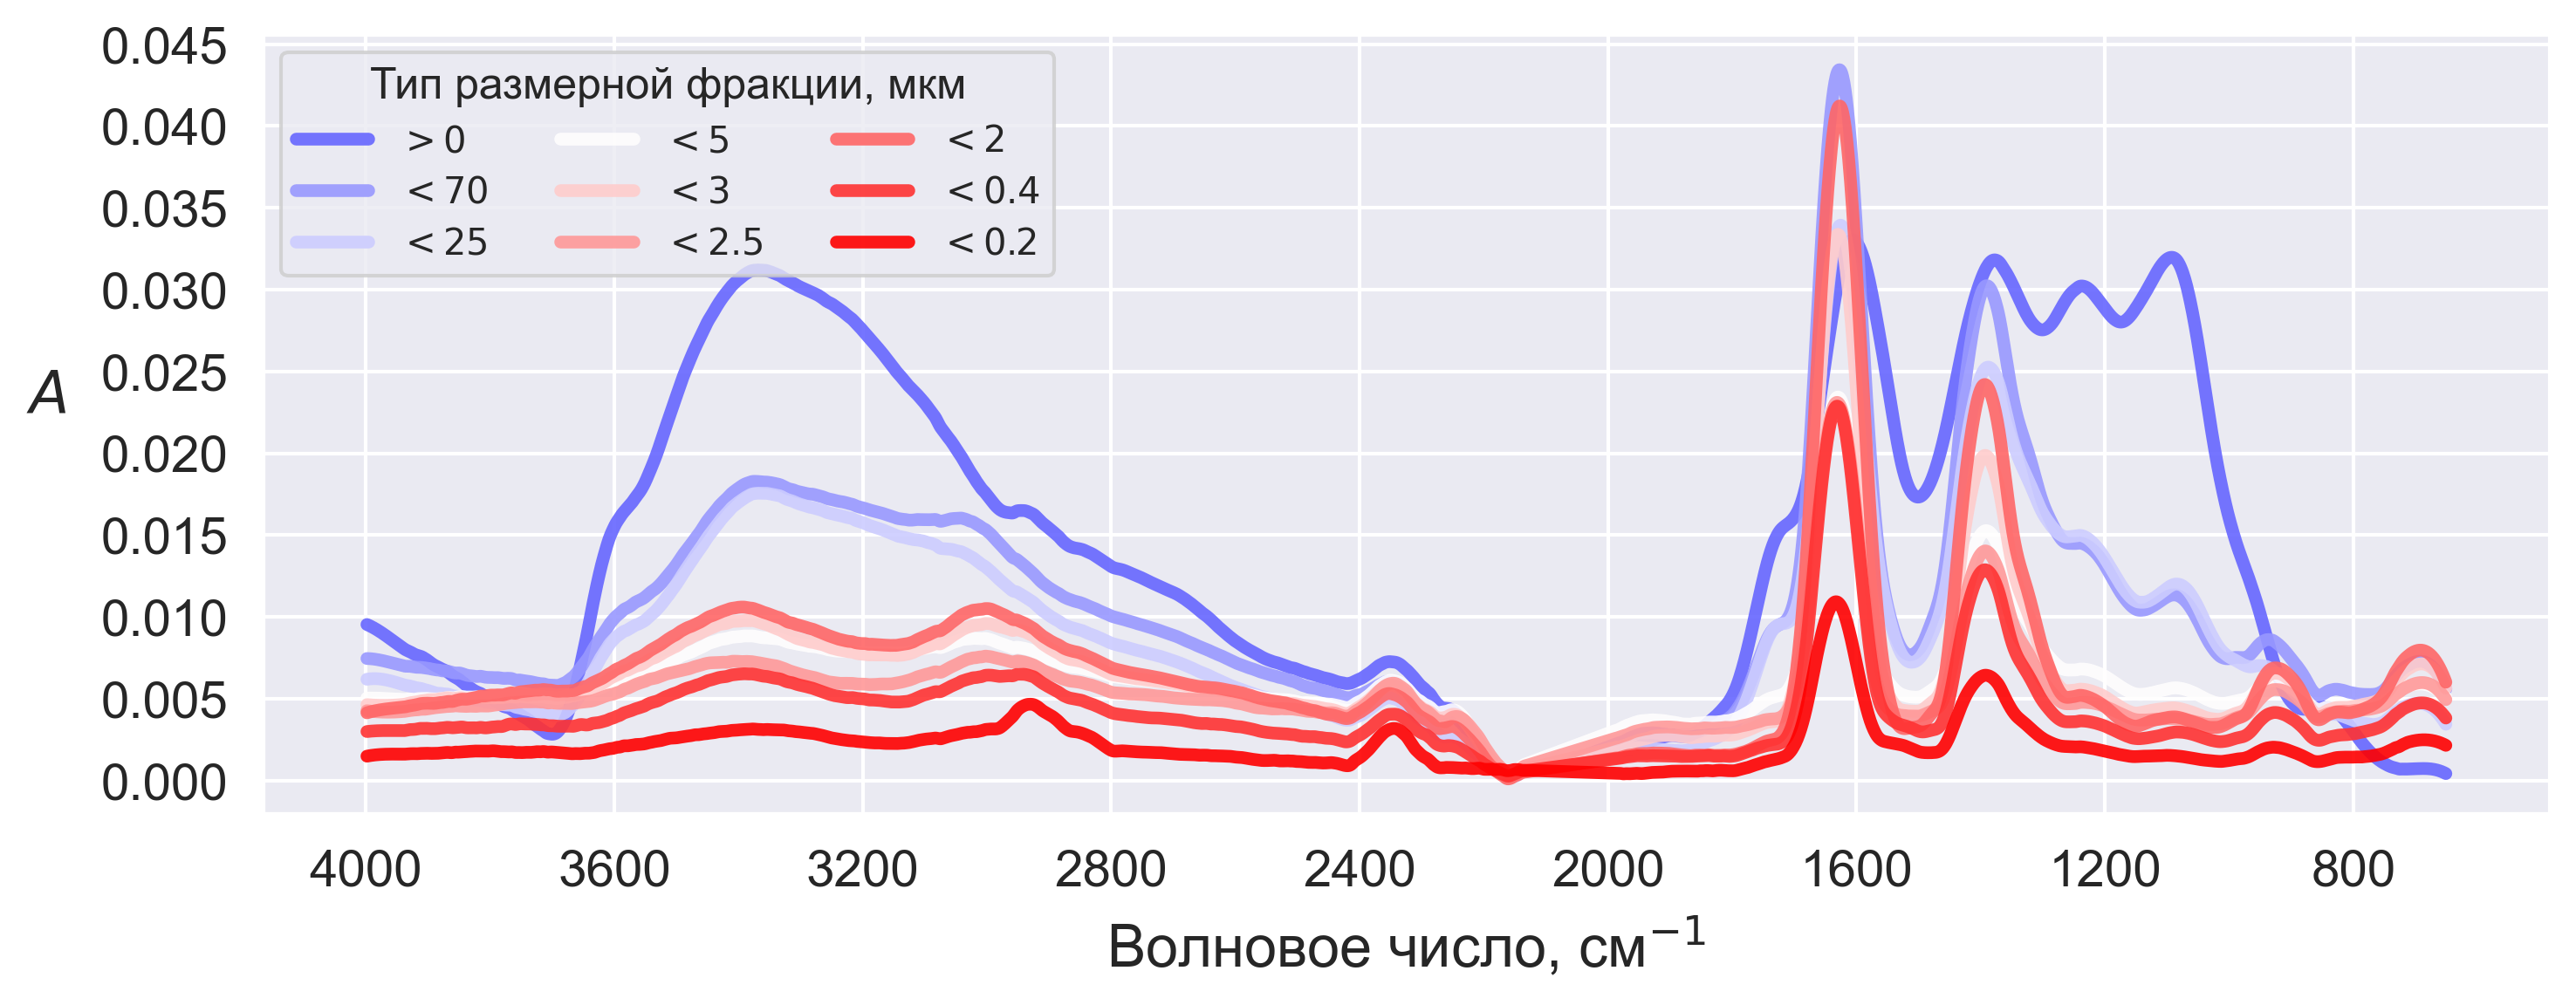

In [19]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=300)

custom_plot_params['TITLE'] = ''
custom_legend['TITLE'] = 'Тип размерной фракции, мкм'
custom_legend['LOC'] = 'upper left'
custom_legend['NCOL'] = 3
    
plot_spectra(
    data_vis=data_smoothed_vis,
    ax=ax,
    samples_description=samples_description,
    hue_column='Fraction_hue',  # Fraction_hue, Fraction_grouped_hue
    plot_params=custom_plot_params,
    style_params=custom_style,
    legend_params=custom_legend
)

plt.tight_layout()

plt.savefig(f'{path_to_save}/smoothed_spectra_ar_div_9.png', dpi=600)

plt.show()

# Saving data

In [20]:
path_to_save_data = './../data/preprocessed_data'

## Smoothed data & smoothed data by regions

In [21]:
data_smoothed.to_csv(f'{path_to_save_data}/smoothed_data/ftir_smoothed_4000_650.csv', sep=';')
data_smoothed.T.to_csv(f'{path_to_save_data}/smoothed_data/ftir_smoothed_4000_650_transposed.csv', sep=';')

for range, tmp_data in data_smoothed_ranges.items():
    tmp_data.to_csv(f'{path_to_save_data}/smoothed_data/ftir_smoothed_{range[0]}_{range[1]}.csv', sep=';')

## Scaled data by region

In [22]:
for range, tmp_data in data_scaled_ranges.items():
    tmp_data.to_csv(f'{path_to_save_data}/scaled_data/ftir_scaled_{range[0]}_{range[1]}.csv', sep=';')